# Кластеризация (k-means)

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Выбор расстояния (евклидово или манхэттенское)

In [3]:
def assign_clusters(X, centers, i):
    if i == 0:
        return np.array([np.argmin(np.linalg.norm(x - centers, axis=1)) for x in X])
    if i == 1:
        return np.array([np.argmin(np.sum(np.abs(x - centers), axis=1)) for x in X])

### Центр кластера

In [4]:
def move_centers(X, k, clusters, centers):
    new_centers = np.zeros_like(centers)
    for i in range(k):
        cluster = X[clusters == i]
        if not len(cluster):
            continue
        new_centers[i] = np.mean(cluster, axis=0)
    return new_centers

### Метод KMeans

In [5]:
def KMeans(X, k, centers, i):
    clusters = assign_clusters(X, centers, i)
    clusters_equal = False
    while not clusters_equal:
        clusters = assign_clusters(X, centers, i)
        new_centers = move_centers(X, k, clusters, centers)
        clusters_equal = (clusters == assign_clusters(X, new_centers, i)).all()
        centers = new_centers
    return centers, clusters


### Вывод данных

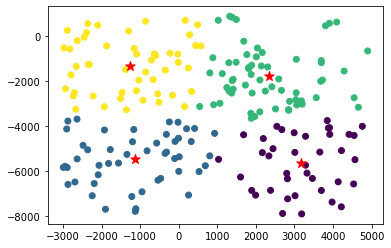

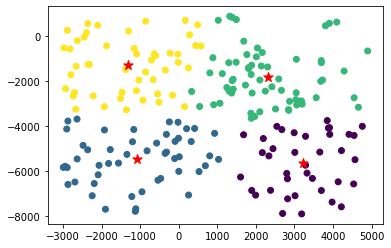

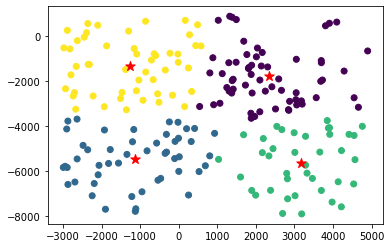

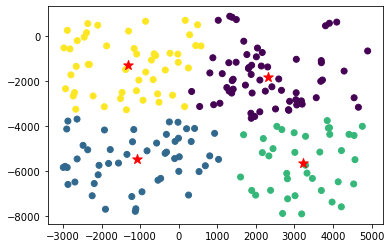

In [75]:
N = 200
k = 4
X = np.array([(random.uniform(-3000, 5000), random.uniform(-8000, 900)) for i in range(N)])
centers = np.zeros((k, 2))
for i in range(2):
    if i == 0:
        centers = X[np.random.choice(len(X), k)]
    if i == 1:
        centers = np.array([(max(X[:, 0]), max(X[:, 1])), (min(X[:, 0]), min(X[:, 1])), (max(X[:, 0]), min(X[:, 1])),
                            (min(X[:, 0]), max(X[:, 1]))])
    for j in range(2):
        centers, clusters = KMeans(X, k, centers, j)
        fig, axs = plt.subplots()
        axs.scatter(X[:, 0], X[:, 1], c=clusters)
        axs.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=100)
        plt.show()


# Дополнение. Выбор оптимального количества кластеров

In [46]:
def inertia(X, centers, labels, p=2):
    nearest_center = centers[labels]
    return np.sum(np.linalg.norm(X - nearest_center, axis=1, ord=p))

### Манхэттенское расстояние

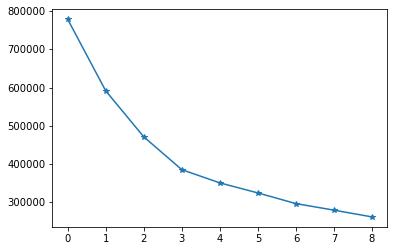

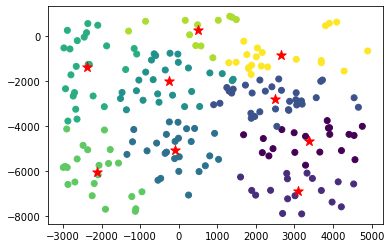

In [76]:
np.random.seed(12)
dist = []

for k in range(1, 10):
    centers = X[np.random.choice(len(X), k)]
    dist.append(inertia(X, *KMeans(X, k, centers, 1), p=1))

plt.plot(dist, marker='*')

cents, lbls = KMeans(X, k, centers, 1)
fig, axs = plt.subplots()
axs.scatter(X[:, 0], X[:, 1], c=lbls)
axs.scatter(cents[:, 0], cents[:, 1], c='red', marker='*', s=100)
plt.show()

### Евклидово расстояние

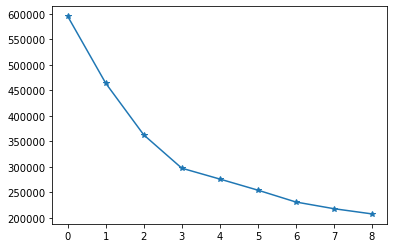

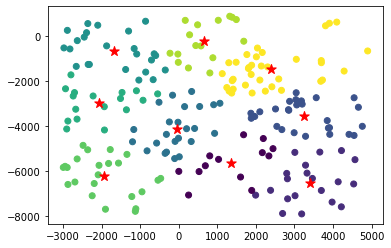

In [77]:
np.random.seed(12)
dist = []

for k in range(1, 10):
    centers = X[np.random.choice(len(X), k)]
    dist.append(inertia(X, *KMeans(X, k, centers, 0), p=2))

plt.plot(dist, marker='*')

cents, lbls = KMeans(X, k, centers, 0)
fig, axs = plt.subplots()
axs.scatter(X[:, 0], X[:, 1], c=lbls)
axs.scatter(cents[:, 0], cents[:, 1], c='red', marker='*', s=100)
plt.show()